# Traffic Sign Classification Using Deep Learning

## Import Libraries and Datasets

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import random
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix

In [12]:
#Using pickle we are are going to open our dataset
with open("./traffic-signs_data/train.p", mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs_data/test.p", mode = 'rb') as testing_data:
    test = pickle.load(testing_data)
with open("./traffic-signs_data/valid.p", mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)

In [13]:
#Training Examples
x_train, y_train = train["features"], train["labels"]
print(x_train.shape, y_train.shape)

(34799, 32, 32, 3) (34799,)


In [14]:
#Testing Examples
x_test, y_test = test["features"], test["labels"]
print(x_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


In [15]:
#Validation Examples
x_validation, y_validation = valid["features"], valid["labels"]
print(x_validation.shape, y_validation.shape)

(4410, 32, 32, 3) (4410,)


## Perform image visualisation

38

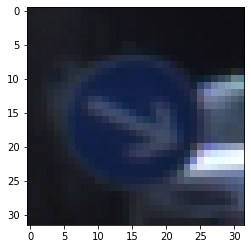

In [16]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

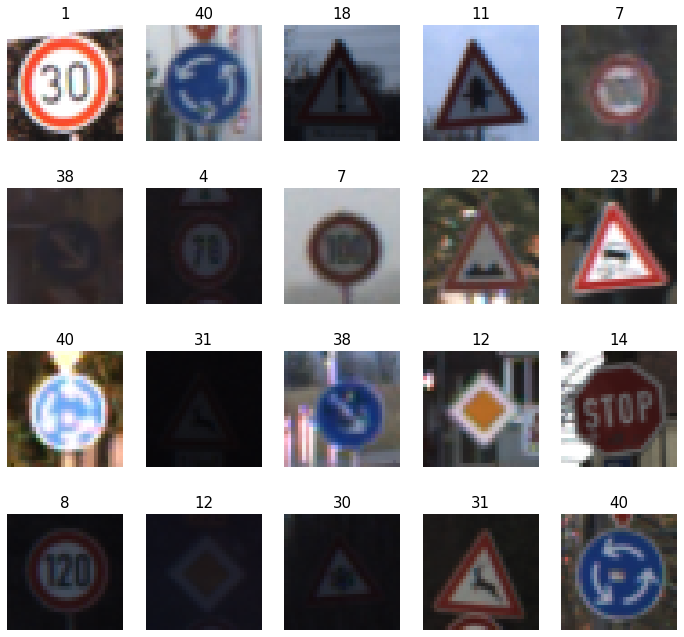

In [71]:
#Creating 20 subplots of each training example
w_grid = 5
l_grid = 4
fig, axes = plt.subplots(l_grid, w_grid, figsize = (12,12))

#Flattens the 5 X 4 grid matrix in 20 array
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid * l_grid):
    
    #Select a random number
    index = np.random.randint(0, n_training)
    #read and display an image with a selected index
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

#To create space between images
plt.subplots_adjust(hspace = 0)


## Convert Image into Greyscale and Perform Normalisation

In [50]:
#from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [87]:
#To convert it GreyScale
#For testing features
x_train_gray = np.sum(x_train/3, axis = 3, keepdims=True)

In [66]:
x_train_gray_norm = (x_train_gray-128)/128

In [77]:
x_train_gray_norm[0]


array([[[-0.7890625 ],
        [-0.78645833],
        [-0.7734375 ],
        ...,
        [-0.79427083],
        [-0.78125   ],
        [-0.78125   ]],

       [[-0.7734375 ],
        [-0.77864583],
        [-0.77604167],
        ...,
        [-0.796875  ],
        [-0.7890625 ],
        [-0.78645833]],

       [[-0.76822917],
        [-0.76822917],
        [-0.75520833],
        ...,
        [-0.78125   ],
        [-0.796875  ],
        [-0.796875  ]],

       ...,

       [[-0.74739583],
        [-0.7265625 ],
        [-0.7265625 ],
        ...,
        [-0.66666667],
        [-0.671875  ],
        [-0.65625   ]],

       [[-0.75      ],
        [-0.70572917],
        [-0.68489583],
        ...,
        [-0.640625  ],
        [-0.63802083],
        [-0.640625  ]],

       [[-0.77083333],
        [-0.73697917],
        [-0.70572917],
        ...,
        [-0.65625   ],
        [-0.66666667],
        [-0.671875  ]]])

#### For Testing Features


In [73]:
x_test_gray = np.sum(x_test/3, axis = 3, keepdims=True)
x_test_gray.shape

(12630, 32, 32, 1)

In [74]:
x_test_gray_norm = (x_test_gray-128)/128

#### For Validation Features


In [75]:
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims=True)
x_validation_gray.shape

(4410, 32, 32, 1)

In [76]:
x_validation_gray_norm = (x_validation_gray-128)/128

<Figure size 432x288 with 0 Axes>

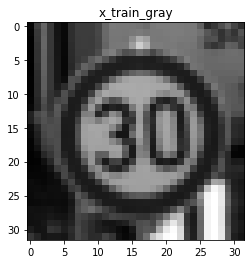

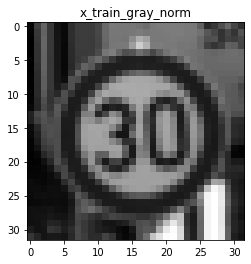

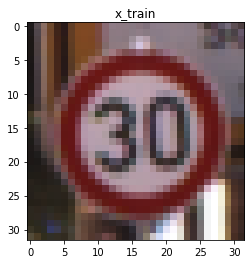

<Figure size 432x288 with 0 Axes>

In [86]:
#To check difference between x_train, x_train_gray, x_train_gray_norm
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.title("x_train_gray")
plt.figure()

plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')
plt.title("x_train_gray_norm")
plt.figure()

plt.imshow(x_train[i].squeeze(), cmap = 'gray')
plt.title("x_train")
plt.figure()


## Building Deep Convolution Neural Network Model

In [105]:
#from tensorflow.keras import datasets, layers, models
cnn = models.Sequential()

#Convolution Layer1
cnn.add(layers.Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape = (32, 32, 1)))

#Downsampling Layer1
cnn.add(layers.AveragePooling2D())

#Dropout
cnn.add(Dropout(0.2))

#Convolution Layer2
cnn.add(layers.Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))

#Downsampling Layer2
cnn.add(layers.AveragePooling2D())

#Flattening Layer1
cnn.add(layers.Flatten())

#Dense Layer1
cnn.add(layers.Dense(120, activation='relu'))
#Dense Layer2
cnn.add(layers.Dense(84, activation='relu'))
#Dense Layer3
#Since we are classifying 43 different classes
cnn.add(layers.Dense(43, activation='softmax'))
cnn.summary()



Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_14 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 120)             

## Compile and Train Deep CNN Model

In [108]:
#Compiling the model
cnn.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [147]:
#Training the training sets in the model
history = cnn.fit(x_train_gray_norm,
                 y_train,
                 batch_size = 500,
                 epochs = 25,
                 verbose = 1,
                 validation_data = (x_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/25
34799/34799 [==============================] - 7s 207us/sample - loss: 0.1280 - accuracy: 0.9612 - val_loss: 0.2139 - val_accuracy: 0.9367
Epoch 2/25
34799/34799 [==============================] - 7s 212us/sample - loss: 0.1248 - accuracy: 0.9620 - val_loss: 0.1858 - val_accuracy: 0.9476
Epoch 3/25
34799/34799 [==============================] - 8s 234us/sample - loss: 0.1257 - accuracy: 0.9619 - val_loss: 0.1854 - val_accuracy: 0.9474
Epoch 4/25
34799/34799 [==============================] - 8s 242us/sample - loss: 0.1204 - accuracy: 0.9628 - val_loss: 0.1877 - val_accuracy: 0.9515
Epoch 5/25
34799/34799 [==============================] - 8s 236us/sample - loss: 0.1223 - accuracy: 0.9632 - val_loss: 0.1915 - val_accuracy: 0.9444
Epoch 6/25
34799/34799 [==============================] - 8s 219us/sample - loss: 0.1200 - accuracy: 0.9625 - val_loss: 0.2154 - val_accuracy: 0.9417
Epoch 7/25
34799/34799 [===========================

## Assess Trained CNN Model Performance

In [148]:
#Accuracy of the model
score = cnn.evaluate(x_test_gray_norm, y_test)
print("Test Accuracy: {}".format(score[1]))

12630/12630 [==============================] - 3s 229us/sample - loss: 0.3535 - accuracy: 0.9323
Test Accuracy: 0.9323040246963501


In [149]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [150]:
accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
loss = history.history['loss']
valid_loss = history.history['val_loss']

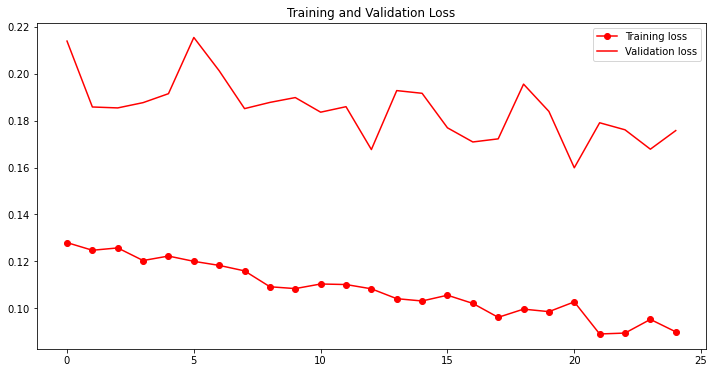

In [159]:
epochs = range(len(accuracy))
plt.figure(figsize = (12,6))
plt.plot(epochs, loss, color = 'r', marker = 'o', label = 'Training loss')
plt.plot(epochs, valid_loss, color = 'r', label = 'Validation loss')
plt.title("Training and Validation Loss")

plt.legend()

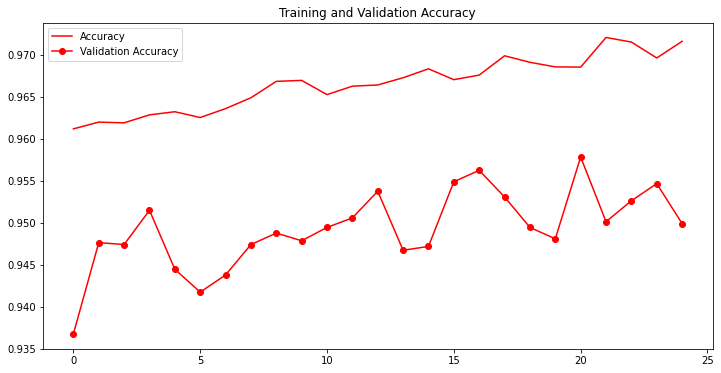

In [160]:
plt.figure(figsize = (12,6))
plt.plot(epochs, accuracy, color = 'r', label = 'Accuracy')
plt.plot(epochs, valid_accuracy, color = 'r', marker ='o', label = 'Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

### Visualise and Plot Confusion Matrix

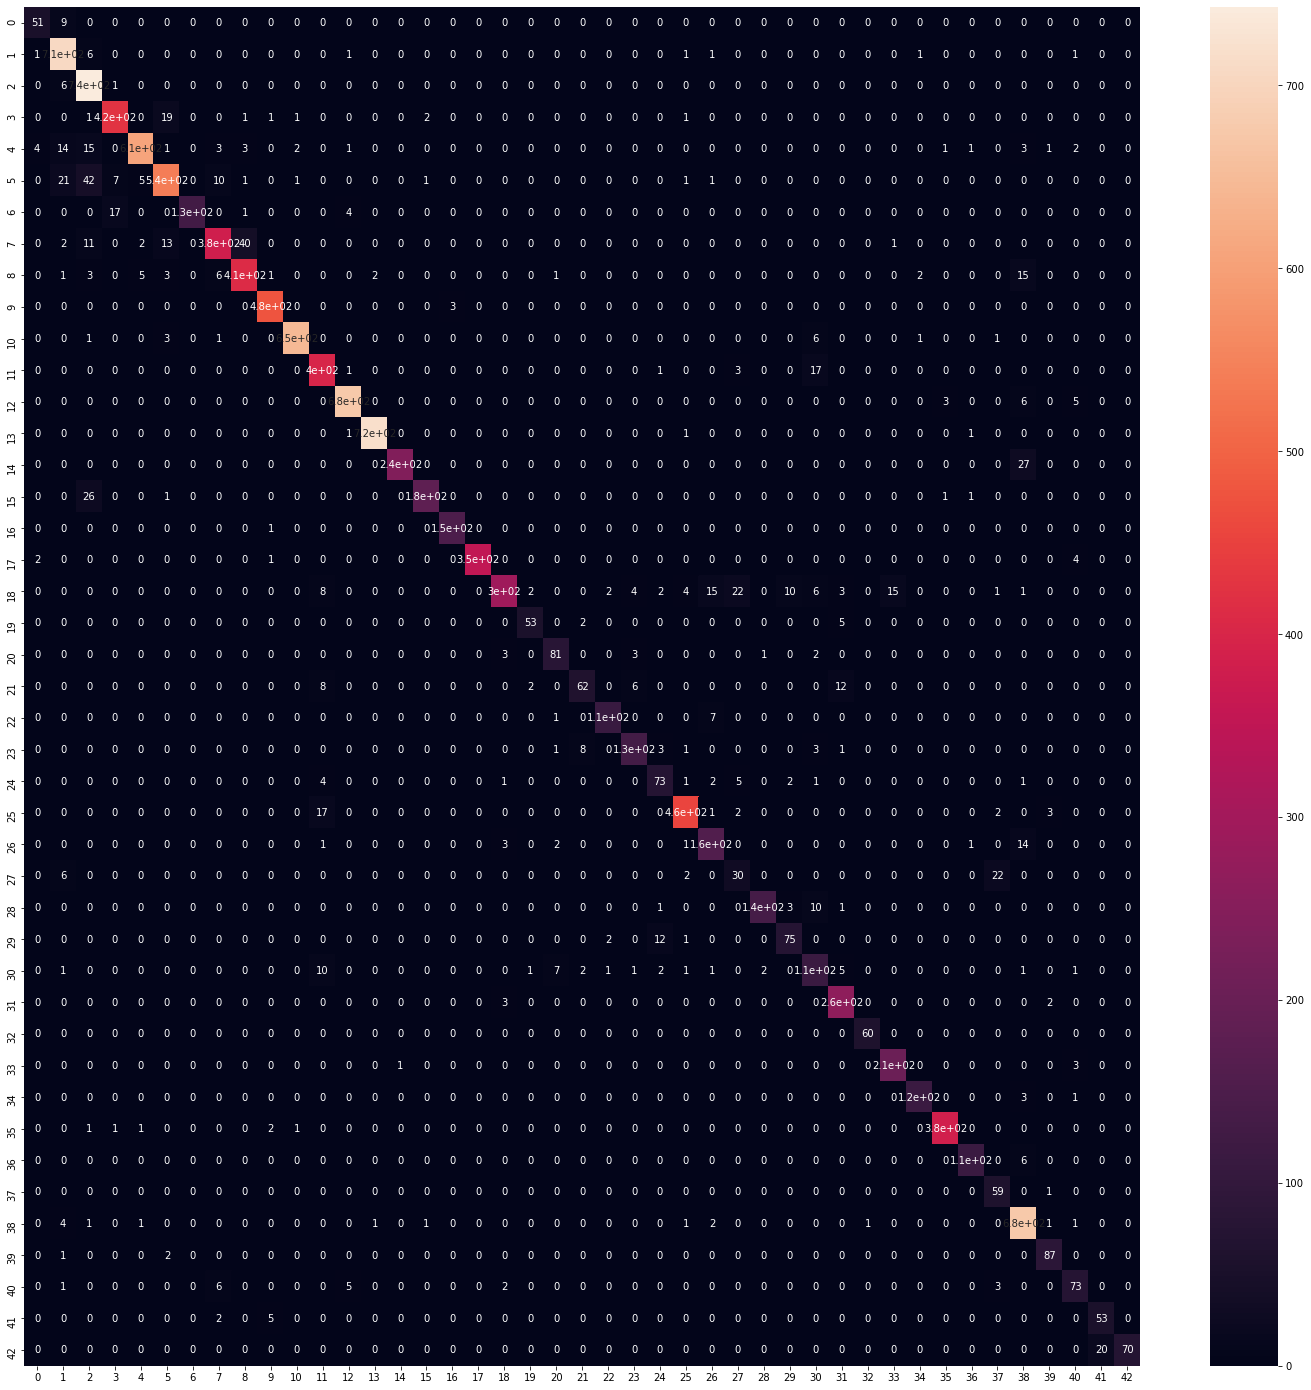

In [165]:
predicted_classes= cnn.predict_classes(x_test_gray_norm)
y_true = y_test
#from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)


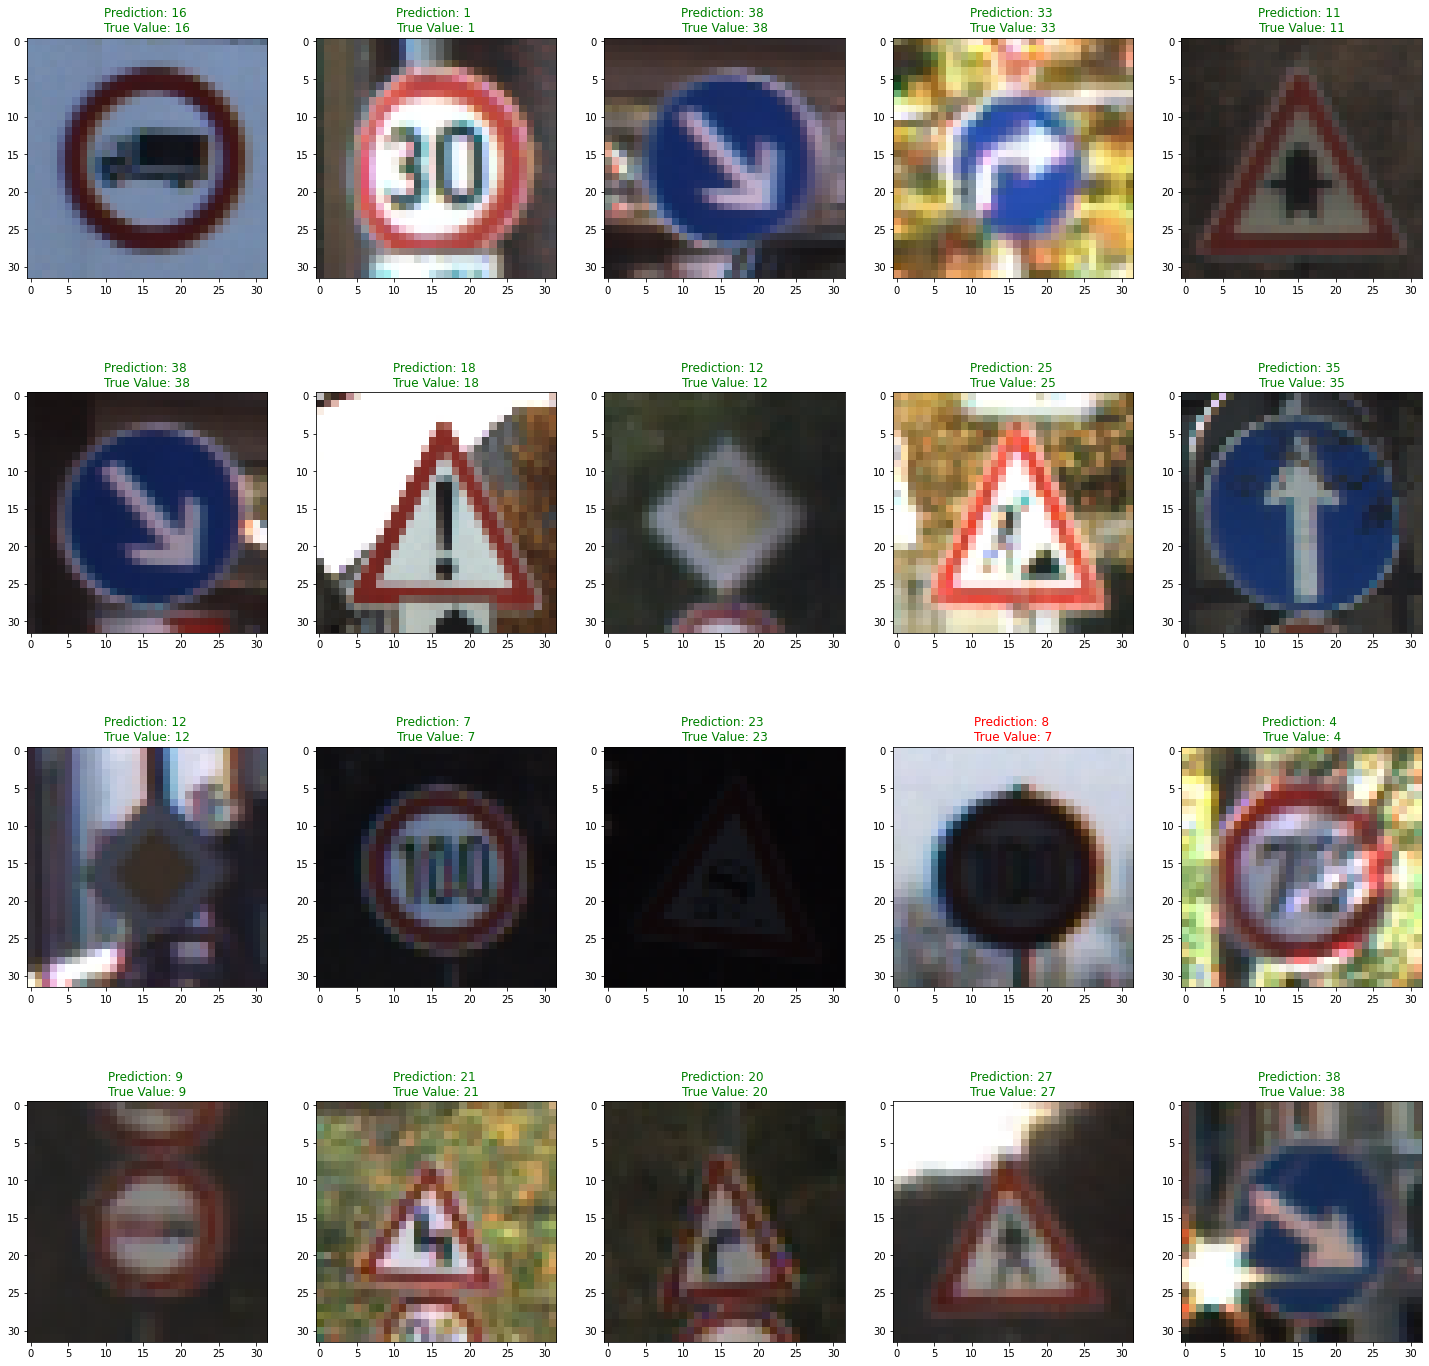

In [174]:
L= 4
W = 5

fig, axes = plt.subplots(L, W, figsize = (25,25))
axes = axes.ravel()
for i in np.arange(L*W):
    axes[i].imshow(x_test[i])
    col = 'green'
    if predicted_classes[i]!= y_true[i]:
        col = 'red'
    axes[i].set_title("Prediction: {} \nTrue Value: {}".format(predicted_classes[i], y_true[i]), color = col)


## Appendix

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images.
- Classes are as listed below:
  - 0 = Speed limit (20km/h)
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h)
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h)
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011.
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }
